Import Libaries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

Load the Dataset

In [ ]:
df=pd.read_csv('/content/car_price.csv')

In [ ]:
df

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats
...,...,...,...,...,...,...,...,...,...,...
5507,5507,BMW X1 sDrive 20d xLine,28.90 Lakh,"45,000 kms",Diesel,Automatic,1st Owner,2018,2995 cc,7 Seats
5508,5508,BMW M Series M4 Coupe,64.90 Lakh,"29,000 kms",Petrol,Automatic,2nd Owner,2015,1968 cc,5 Seats
5509,5509,Jaguar XF 2.2 Litre Luxury,13.75 Lakh,"90,000 kms",Diesel,Automatic,2nd Owner,2013,2755 cc,5 Seats
5510,5510,BMW 7 Series 730Ld,29.90 Lakh,"79,000 kms",Diesel,Automatic,3rd Owner,2015,2967 cc,6 Seats


Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5512 non-null   int64 
 1   car_name             5512 non-null   object
 2   car_prices_in_rupee  5512 non-null   object
 3   kms_driven           5512 non-null   object
 4   fuel_type            5512 non-null   object
 5   transmission         5512 non-null   object
 6   ownership            5512 non-null   object
 7   manufacture          5512 non-null   int64 
 8   engine               5512 non-null   object
 9   Seats                5512 non-null   object
dtypes: int64(2), object(8)
memory usage: 430.8+ KB


In [ ]:
df[df.duplicated()].count()

Unnamed: 0             0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [ ]:
df[df.isna()].count()

Unnamed: 0             0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [ ]:
df=df.drop(columns='Unnamed: 0',axis=1)

In [ ]:
df.loc[df['car_prices_in_rupee'].str.contains('Lakh'), 'Currency'] = 'Lakh'
df.loc[df['car_prices_in_rupee'].str.contains('Crore'), 'Currency'] = 'Crore'

In [ ]:
df=df.dropna()

In [ ]:
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,Currency
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,Lakh
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,Lakh
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats,Lakh
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats,Lakh
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats,Lakh


In [ ]:
df['kms_driven']=df['kms_driven'].str.replace(' kms','')
df['car_prices_in_rupee']=df['car_prices_in_rupee'].str.replace(' Lakh','')
df['kms_driven']=df['kms_driven'].str.replace(',','')
df['Seats']=df['Seats'].str.replace(' Seats','')
df['engine']=df['engine'].str.replace(' cc','')
df['car_prices_in_rupee']=df['car_prices_in_rupee'].str.replace(' Crore','')
df['car_prices_in_rupee']=df['car_prices_in_rupee'].astype('float')
df['kms_driven']=df['kms_driven'].astype('int')
df['Seats']=df['Seats'].astype('int')
df['engine']=df['engine'].astype('int')

In [ ]:
df['car_prices_in_rupee']=np.where(df['Currency'] == 'Crore', df['car_prices_in_rupee'] * 100, df['car_prices_in_rupee'])
df['car_prices_in_rupee']=df['car_prices_in_rupee']*100000

In [ ]:
df2=pd.read_csv('/content/car_price.csv')
df2=df2[df2["car_prices_in_rupee"].str.contains("Lakh")==False]
df2=df2[df2["car_prices_in_rupee"].str.contains("Crore")==False]
df2['kms_driven']=df2['kms_driven'].str.replace(' kms','')
df2['kms_driven']=df2['kms_driven'].str.replace(',','')
df2['Seats']=df2['Seats'].str.replace(' Seats','')
df2['engine']=df2['engine'].str.replace(' cc','')
df2['car_prices_in_rupee']=df2['car_prices_in_rupee'].str.replace(',','')
df2['car_prices_in_rupee']=df2['car_prices_in_rupee'].astype('int')
df2['kms_driven']=df2['kms_driven'].astype('int')
df2['Seats']=df2['Seats'].astype('int')
df2['engine']=df2['engine'].astype('int')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 238 to 5439
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           123 non-null    int64 
 1   car_name             123 non-null    object
 2   car_prices_in_rupee  123 non-null    int64 
 3   kms_driven           123 non-null    int64 
 4   fuel_type            123 non-null    object
 5   transmission         123 non-null    object
 6   ownership            123 non-null    object
 7   manufacture          123 non-null    int64 
 8   engine               123 non-null    int64 
 9   Seats                123 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 10.6+ KB


In [ ]:
df2

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
238,238,Maruti Swift 1.3 LXI,99999,80000,Petrol,Manual,3rd Owner,2007,1298,5
243,243,Maruti Zen LX,55000,90000,Petrol,Manual,3rd Owner,2002,993,5
342,342,Maruti Alto LXi BSIII,84778,70229,Petrol,Manual,4th Owner,2008,796,5
675,675,Maruti Esteem VX - BSII,59000,60000,Petrol,Manual,1st Owner,2007,1497,5
734,734,Hyundai Santro Xing GL,90000,80000,Petrol,Manual,2nd Owner,2008,2993,5
...,...,...,...,...,...,...,...,...,...,...
5050,5050,Maruti Wagon R LXI Minor,82642,166155,Petrol,Manual,2nd Owner,2008,1461,5
5094,5094,Chevrolet Spark 1.0 PS,73582,89133,Petrol,Manual,1st Owner,2009,1497,5
5149,5149,Chevrolet Spark 1.0 LS LPG,59736,192340,Lpg,Manual,2nd Owner,2010,1390,5
5177,5177,Tata Indica TDI LS,95633,130265,Diesel,Manual,2nd Owner,2013,1197,5


In [ ]:
df3=[df,df2]
df=pd.concat(df3)

In [ ]:
df=df.drop(columns='Unnamed: 0',axis=1)
df=df.drop(columns='Currency',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5512 entries, 0 to 5439
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             5512 non-null   object 
 1   car_prices_in_rupee  5512 non-null   float64
 2   kms_driven           5512 non-null   int64  
 3   fuel_type            5512 non-null   object 
 4   transmission         5512 non-null   object 
 5   ownership            5512 non-null   object 
 6   manufacture          5512 non-null   int64  
 7   engine               5512 non-null   int64  
 8   Seats                5512 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 430.6+ KB


In [ ]:
df

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,1003000.0,86226,Diesel,Manual,1st Owner,2017,1956,5
1,Renault Duster RXZ Turbo CVT,1283000.0,13248,Petrol,Automatic,1st Owner,2021,1330,5
2,Toyota Camry 2.5 G,1640000.0,60343,Petrol,Automatic,1st Owner,2016,2494,5
3,Honda Jazz VX CVT,777000.0,26696,Petrol,Automatic,1st Owner,2018,1199,5
4,Volkswagen Polo 1.2 MPI Highline,515000.0,69414,Petrol,Manual,1st Owner,2016,1199,5
...,...,...,...,...,...,...,...,...,...
5050,Maruti Wagon R LXI Minor,82642.0,166155,Petrol,Manual,2nd Owner,2008,1461,5
5094,Chevrolet Spark 1.0 PS,73582.0,89133,Petrol,Manual,1st Owner,2009,1497,5
5149,Chevrolet Spark 1.0 LS LPG,59736.0,192340,Lpg,Manual,2nd Owner,2010,1390,5
5177,Tata Indica TDI LS,95633.0,130265,Diesel,Manual,2nd Owner,2013,1197,5


<AxesSubplot:title={'center':'Average car price by Year'}, xlabel='manufacture'>

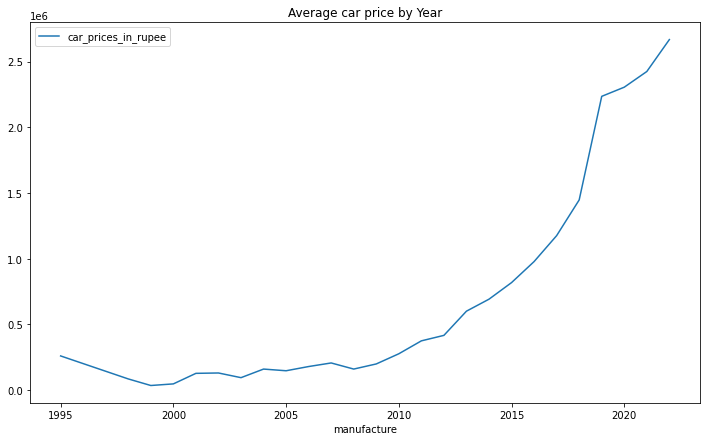

In [ ]:
p1=pd.pivot_table(df, index=['manufacture'],values = ['car_prices_in_rupee'],aggfunc = 'mean') 
p1.plot(kind='line',figsize=(12,7),title='Average car price by Year')

<AxesSubplot:title={'center':'Average car price by Number of seats'}, xlabel='Seats'>

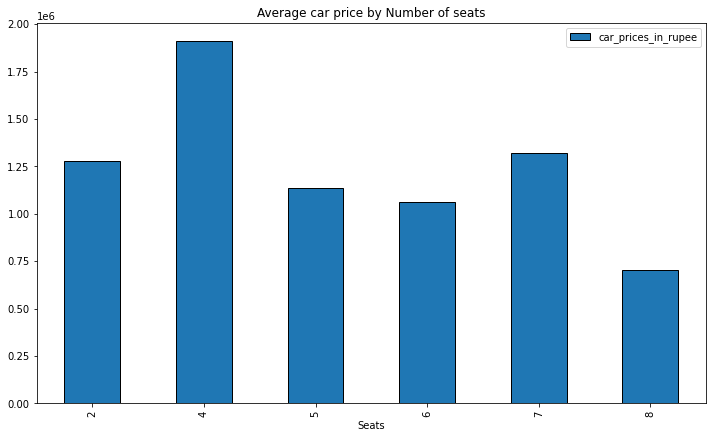

In [ ]:
p2=pd.pivot_table(df, index=['Seats'],values = ['car_prices_in_rupee'],aggfunc = 'mean') 
p2.plot(kind='bar',figsize=(12,7),title='Average car price by Number of seats',edgecolor = 'black')

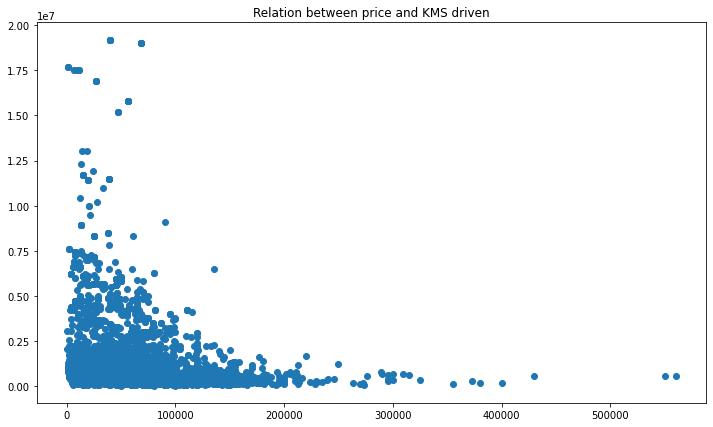

In [ ]:
plt.figure(figsize=(12,7))
plt.title('Relation between price and KMS driven')
plt.scatter(df.kms_driven,df.car_prices_in_rupee)

<AxesSubplot:title={'center':'Price level by number of owners'}, xlabel='ownership'>

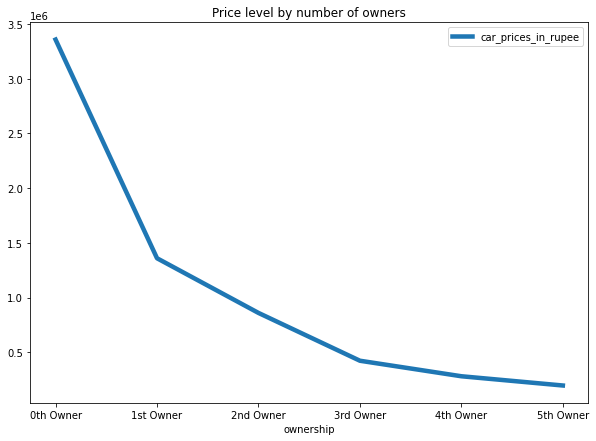

In [ ]:
p3=pd.pivot_table(df,index='ownership',values='car_prices_in_rupee')
p3.plot(kind='line',figsize=(10,7),linewidth=4.5,title='Price level by number of owners')

<AxesSubplot:title={'center':'Average price by Fuel type'}, ylabel='transmission'>

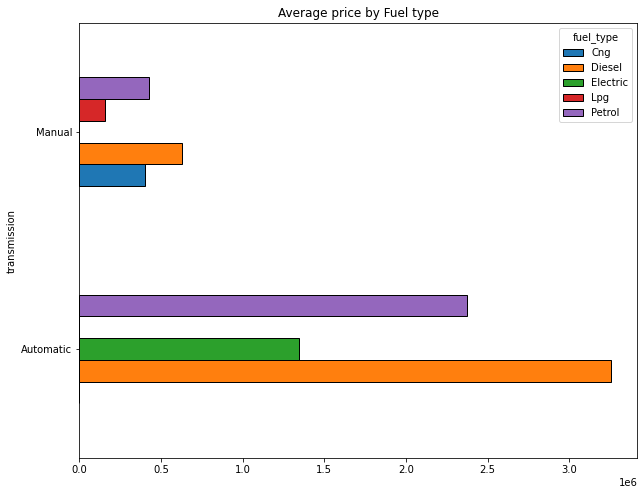

In [ ]:
p4=pd.pivot_table(df,index='transmission',values='car_prices_in_rupee',columns='fuel_type')
p4.plot(kind='barh',figsize=(10,8),edgecolor = 'black',title='Average price by Fuel type')

<AxesSubplot:title={'center':'Number of cars by Fuel type'}, ylabel='fuel_type'>

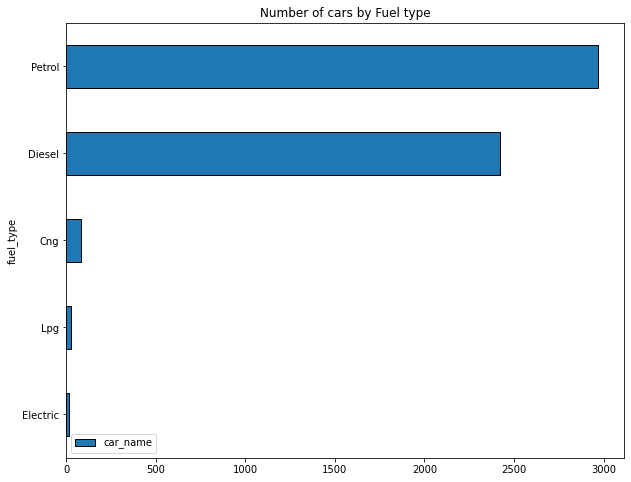

In [ ]:
p5=pd.pivot_table(df,index='fuel_type',values='car_name',aggfunc='count').sort_values(by='car_name')
p5.plot(kind='barh', edgecolor = 'black',figsize=(10,8),title='Number of cars by Fuel type')

array([<AxesSubplot:ylabel='car_name'>], dtype=object)

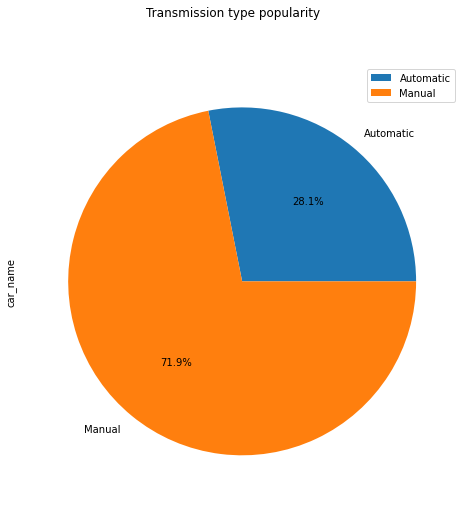

In [ ]:
p6=pd.pivot_table(df,index='transmission',values='car_name',aggfunc='count')
p6.plot(kind='pie',figsize=(10,8),subplots=True,autopct='%1.1f%%',title='Transmission type popularity')

In [ ]:
df1=df

In [ ]:
df1['car_name']=pd.factorize(df1.car_name)[0]
df1['fuel_type']=pd.factorize(df1.fuel_type)[0]
df1['transmission']=pd.factorize(df1.transmission)[0]
df1['ownership']=pd.factorize(df1.ownership)[0]


In [ ]:
df1

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,1003000.0,86226,0,0,0,2017,1956,5
1,1,1283000.0,13248,1,1,0,2021,1330,5
2,2,1640000.0,60343,1,1,0,2016,2494,5
3,3,777000.0,26696,1,1,0,2018,1199,5
4,4,515000.0,69414,1,0,0,2016,1199,5
...,...,...,...,...,...,...,...,...,...
5050,199,82642.0,166155,1,0,1,2008,1461,5
5094,1874,73582.0,89133,1,0,0,2009,1497,5
5149,1154,59736.0,192340,4,0,1,2010,1390,5
5177,1895,95633.0,130265,0,0,1,2013,1197,5


<AxesSubplot:>

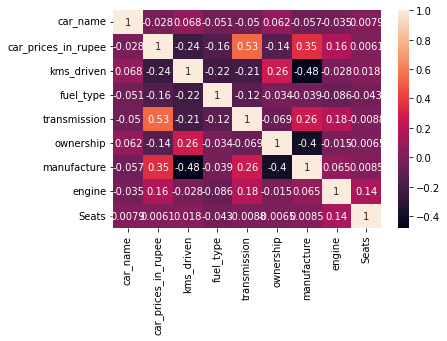

In [ ]:
sns.heatmap(df1.corr(),annot = True)

Train Test Split

In [ ]:
feature = df1.drop(columns='car_prices_in_rupee',axis=1)
target = df1['car_prices_in_rupee']

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(feature, target, test_size = 0.3, random_state = 100)

In [ ]:
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(3858, 8)
(1654, 8)
(3858,)
(1654,)


In [ ]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
df1 = pd.DataFrame(scaler.fit_transform(df1[['car_prices_in_rupee']]))
df1.columns = ['car_prices_in_rupee']

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [ ]:
models = pd.DataFrame(columns = ["Model","MAE","MSE","RMSE","R2 Score"])

Apply Model

In [ ]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(Xtrain , Ytrain)
predict = model1.predict(Xtest)
mae, mse, rmse, r_squared = evaluation(Ytest, predict)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 786476.8952041332
MSE: 2629520957954.0957
RMSE: 1621579.7723066527
R2 Score: 0.33970970681148005


In [ ]:
new_row = {"Model": "Linear Regression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index = True)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators = 100)
model2.fit(Xtrain, Ytrain)
predict = model2.predict(Xtest)
mae, mse, rmse, r_squared = evaluation(Ytest, predict)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 437925.7617875857
MSE: 1337424817644.0615
RMSE: 1156470.8459983163
R2 Score: 0.6641636864355365


In [ ]:
new_row = {"Model": "Random Forest Regressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index = True)

In [ ]:
from sklearn.svm import SVR
model3 = SVR(C = 400000)
model3.fit(Xtrain, Ytrain)
predict = model3.predict(Xtest)
mae, mse, rmse, r_squared = evaluation(Ytest, predict)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 823855.8047091926
MSE: 4079790573159.8384
RMSE: 2019849.1461393444
R2 Score: -0.02446268988683875


In [ ]:
new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index = True)

In [ ]:
from xgboost import XGBRegressor
model4 = XGBRegressor(n_estimators = 1000, learning_rate = 0.01)
model4.fit(Xtrain, Ytrain)
predict = model4.predict(Xtest)

mae, mse, rmse, r_squared = evaluation(Ytest, predict)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 438140.9807025582
MSE: 1232743225208.322
RMSE: 1110289.7032794289
R2 Score: 0.6904499341841053


In [ ]:
new_row = {"Model": "XGB Regressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index = True)

Model Accuracy/Score

In [ ]:
models

,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,786476.895204,2.629521e+12,1.621580e+06,0.339710
1,Random Forest Regressor,437925.761788,1.337425e+12,1.156471e+06,0.664164
2,SVR,823855.804709,4.079791e+12,2.019849e+06,-0.024463
3,XGB Regressor,438140.980703,1.232743e+12,1.110290e+06,0.690450


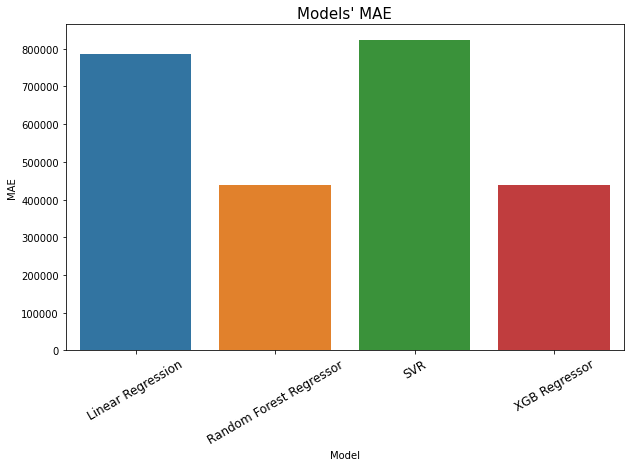

In [ ]:
plt.figure(figsize = (10, 6))
sns.barplot(x = models["Model"], y = models["MAE"])
plt.title("Models' MAE", size = 15)
plt.xticks(rotation = 30, size = 12)
plt.show()

In [ ]:
df['Price_prediction']=model2.predict(feature)

In [ ]:
df

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,Price_prediction
0,0,1003000.0,86226,0,0,0,2017,1956,5,1059900.00
1,1,1283000.0,13248,1,1,0,2021,1330,5,1327760.00
2,2,1640000.0,60343,1,1,0,2016,2494,5,1491180.00
3,3,777000.0,26696,1,1,0,2018,1199,5,783130.00
4,4,515000.0,69414,1,0,0,2016,1199,5,525570.00
...,...,...,...,...,...,...,...,...,...,...
5050,199,82642.0,166155,1,0,1,2008,1461,5,162005.14
5094,1874,73582.0,89133,1,0,0,2009,1497,5,65963.45
5149,1154,59736.0,192340,4,0,1,2010,1390,5,112422.64
5177,1895,95633.0,130265,0,0,1,2013,1197,5,145255.76


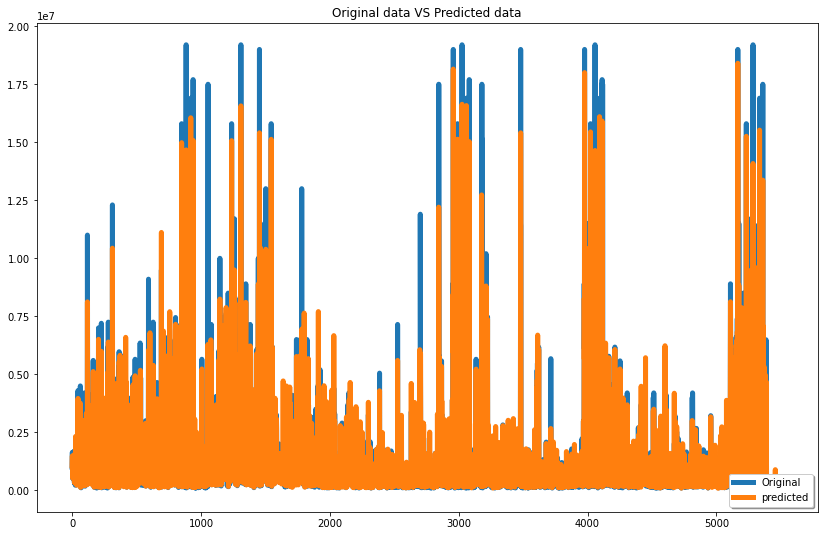

In [ ]:
pred=df['Price_prediction']
x_ax = range(len(target))
plt.figure(figsize=(14,9))
plt.plot(x_ax, target,linewidth = '5', label="Original")
plt.plot(x_ax, pred, linewidth = '5', label="predicted")
plt.title("Original data VS Predicted data")
plt.legend(loc='lower right',fancybox=True, shadow=True)
plt.show() 

Text(0.5, 1.0, 'Predict Data and Original data correlation')

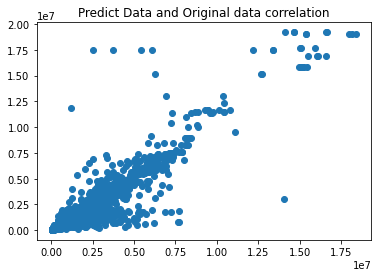

In [ ]:
plt.scatter(df['Price_prediction'],df['car_prices_in_rupee'])
plt.title('Predict Data and Original data correlation')